In [105]:
import os
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'py_functions'))
print(os.path.dirname(os.getcwd()))
from sklearn.decomposition import NMF
import NMF_funcs as NMFf
import scipy

T:\EL_experiment\Codes\CCEP_human\Python_Analysis


In [192]:
def get_nnmf(X, rank, it=2000):
    W = np.zeros((X.shape[0], rank))
    X0 = np.delete(X, np.where(np.mean(X, 1) == 0)[0], 0)

    model = NMF(n_components=rank, init='nndsvda', max_iter=it)
    W0 = model.fit_transform(X0)
    H = model.components_
    W[np.where(np.mean(X, 1) > 0)[0], :] = W0

    return W, H

In [193]:
# intensity array 0 - 10 mA, randomized
int_array = np.repeat(np.arange(10),20)
np.random.shuffle(int_array)
#Matrix input: 10 channels x 200 trials with random values 1-5
M_input = np.random.randint(1,5, (10,200))
# some channels (rows) are increasing by intenstiy
ix_resp_chan = [0,3,5]#np.unique(np.random.randint(1,M_input.shape[0], (5,)))
M_input[ix_resp_chan,:] = M_input[ix_resp_chan,:] + 2*int_array
ix_resp_chan = [1,2,9]

M_input[ix_resp_chan,:] = M_input[ix_resp_chan,:] +np.array([int_array>2])*20
M_input[ix_resp_chan,:] = M_input[ix_resp_chan,:] +np.array([int_array>7])*20

In [200]:
rk = 3
[W, H] = get_nnmf(M_input, rk, it=2000)

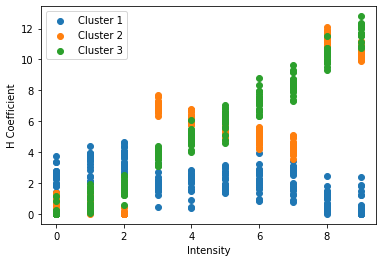

Cluster 2 is not depending on intensity.


In [201]:
# Plot H coefficient against intesnity
plt.scatter(int_array, H[0], label='Cluster 1')
plt.scatter(int_array, H[1], label='Cluster 2')
plt.scatter(int_array, H[2], label='Cluster 3')
plt.legend()
plt.xlabel ( 'Intensity')
plt.ylabel('H Coefficient')
plt.show()
print( 'Cluster 2 is not depending on intensity.')

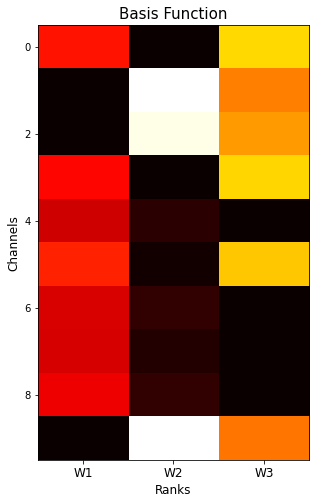

In [203]:
NMFf.plot_W(W,  'Basis Function', file=0)

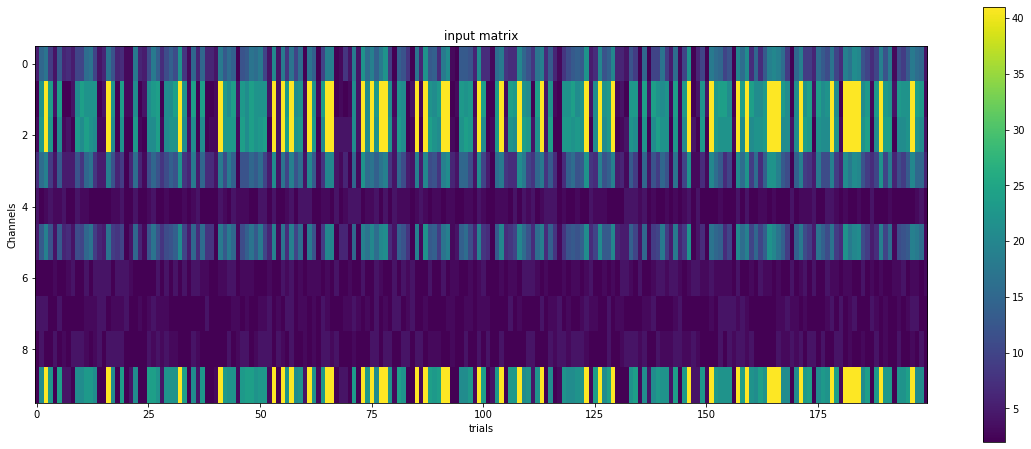

In [206]:
NMFf.plot_V(M_input, 'input matrix' )


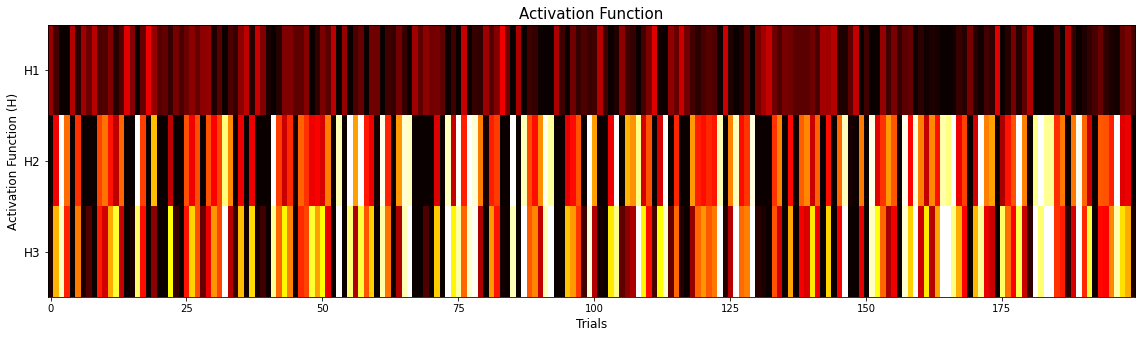

In [207]:
NMFf.plot_H(H,  'Activation Function', file=0)